In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from datetime import date,timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
today = date.today()
years=5

start_date = (today - (date(today.year + years, 1, 1) - date(today.year, 1, 1)))
end_date = date.today()

stock = 'ADBE'
pe_value=yf.Ticker(stock).info

data = yf.download(stock, start_date, end_date)
pe_value['trailingPE']


[*********************100%%**********************]  1 of 1 completed


50.074776

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-21,530.309998,535.000000,524.719971,533.440002,533.440002,6614100
2024-06-24,532.099976,534.580017,523.479980,524.169983,524.169983,3067800
2024-06-25,526.200012,529.679993,522.239990,526.880005,526.880005,3144200
2024-06-26,528.580017,530.659973,526.010010,528.659973,528.659973,2931700
2024-06-27,533.210022,549.159973,532.099976,546.760010,546.760010,4732100


In [ ]:
print("Shape of data:",data.shape)

Shape of data: (1258, 6)


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,449.148315,454.757066,443.171821,449.177544,449.177544,3.024767e+06
std,107.463018,108.162607,106.570059,107.380536,107.380536,1.779598e+06
min,261.000000,265.519989,255.130005,261.089996,261.089996,5.892000e+05
25%,354.480003,360.165009,349.322510,356.657501,356.657501,2.051100e+06
50%,458.404999,464.865005,451.695007,458.104996,458.104996,2.586650e+06
75%,518.822479,525.375000,512.345001,518.729996,518.729996,3.441550e+06
max,696.280029,699.539978,678.909973,688.369995,688.369995,2.784020e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-06-28 to 2024-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#data = data[['Open','Close', 'High', 'Low', 'Volume']]
#data.head(10)

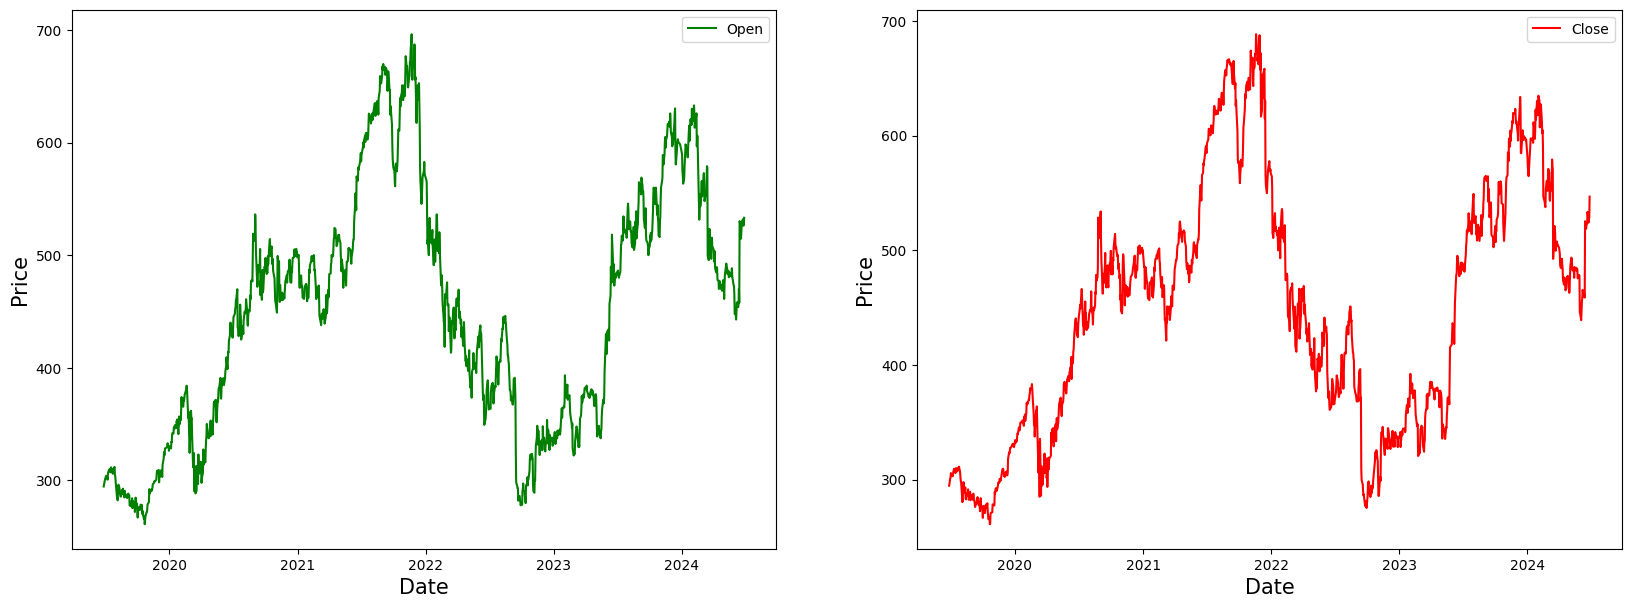

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['Close'],label='Close',color='Red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [ ]:
df=data.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,294.500000,295.100006,291.950012,294.649994,294.649994,2648300
2019-07-01,299.549988,301.899994,297.660004,300.970001,300.970001,2619500
2019-07-02,301.190002,301.579987,299.359985,301.390015,301.390015,1816600
2019-07-03,302.000000,305.859985,301.290009,305.700012,305.700012,1585300
2019-07-05,304.010010,305.239990,298.929993,303.980011,303.980011,2872700
...,...,...,...,...,...,...
2024-06-21,530.309998,535.000000,524.719971,533.440002,533.440002,6614100
2024-06-24,532.099976,534.580017,523.479980,524.169983,524.169983,3067800
2024-06-25,526.200012,529.679993,522.239990,526.880005,526.880005,3144200


In [ ]:
#df = df[['Open']]

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,294.500000,295.100006,291.950012,294.649994,294.649994,2648300
2019-07-01,299.549988,301.899994,297.660004,300.970001,300.970001,2619500
2019-07-02,301.190002,301.579987,299.359985,301.390015,301.390015,1816600
2019-07-03,302.000000,305.859985,301.290009,305.700012,305.700012,1585300
2019-07-05,304.010010,305.239990,298.929993,303.980011,303.980011,2872700
...,...,...,...,...,...,...
2024-06-21,530.309998,535.000000,524.719971,533.440002,533.440002,6614100
2024-06-24,532.099976,534.580017,523.479980,524.169983,524.169983,3067800
2024-06-25,526.200012,529.679993,522.239990,526.880005,526.880005,3144200


In [ ]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,0.076962,0.068154,0.086885,0.078543,0.078543,0.075561
2019-07-01,0.088564,0.083821,0.100359,0.093335,0.093335,0.074504
2019-07-02,0.092331,0.083084,0.104370,0.094318,0.094318,0.045041
2019-07-03,0.094192,0.092945,0.108924,0.104405,0.104405,0.036553
2019-07-05,0.098810,0.091517,0.103355,0.100379,0.100379,0.083795
2019-07-08,0.095938,0.086609,0.106187,0.097898,0.097898,0.048439
2019-07-09,0.090884,0.091263,0.106400,0.100894,0.100894,0.038718
2019-07-10,0.101314,0.100917,0.117915,0.107400,0.107400,0.050086
2019-07-11,0.106575,0.102876,0.119803,0.108851,0.108851,0.049991


In [ ]:
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [ ]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 6), (314, 6))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(20,len(dataset)): # Selecting 20 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1

  return (np.array(sequences),np.array(labels))

In [ ]:
x_train, y_train = create_sequence(train_data)
x_test, y_test = create_sequence(test_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((924, 20, 6), (924, 6), (294, 20, 6), (294, 6))

In [ ]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,0.076962,0.068154,0.086885,0.078543,0.078543,0.075561
2019-07-01,0.088564,0.083821,0.100359,0.093335,0.093335,0.074504
2019-07-02,0.092331,0.083084,0.104370,0.094318,0.094318,0.045041
2019-07-03,0.094192,0.092945,0.108924,0.104405,0.104405,0.036553
2019-07-05,0.098810,0.091517,0.103355,0.100379,0.100379,0.083795
...,...,...,...,...,...,...
2023-03-22,0.261900,0.257615,0.251050,0.235490,0.235490,0.120700
2023-03-23,0.248093,0.252822,0.260418,0.252551,0.252551,0.093553
2023-03-24,0.250942,0.252776,0.265680,0.266500,0.266500,0.088224


In [ ]:
x_train


array([[[0.07696195, 0.06815358, 0.08688473, 0.07854334, 0.07854334,
         0.07556053],
        [0.08856365, 0.08382104, 0.10035868, 0.09333459, 0.09333459,
         0.07450369],
        [0.09233137, 0.08308373, 0.10437015, 0.09431759, 0.09431759,
         0.04504055],
        ...,
        [0.10294522, 0.10416576, 0.11959035, 0.11510015, 0.11510015,
         0.03191076],
        [0.10949274, 0.10170042, 0.12027468, 0.11149601, 0.11149601,
         0.02896407],
        [0.11250229, 0.10824389, 0.12773139, 0.11744054, 0.11744054,
         0.03370885]],

       [[0.08856365, 0.08382104, 0.10035868, 0.09333459, 0.09333459,
         0.07450369],
        [0.09233137, 0.08308373, 0.10437015, 0.09431759, 0.09431759,
         0.04504055],
        [0.09419224, 0.09294502, 0.10892446, 0.10440464, 0.10440464,
         0.03655279],
        ...,
        [0.10949274, 0.10170042, 0.12027468, 0.11149601, 0.11149601,
         0.02896407],
        [0.11250229, 0.10824389, 0.12773139, 0.11744054, 0.117

In [ ]:
y_train

array([[0.11702812, 0.10695363, 0.10937281, 0.107962  , 0.107962  ,
        0.08033467],
       [0.10124519, 0.09577902, 0.11189765, 0.09958345, 0.09958345,
        0.05756853],
       [0.09789097, 0.0908484 , 0.09434136, 0.08839634, 0.08839634,
        0.09092143],
       ...,
       [0.25094193, 0.25277643, 0.26568032, 0.26649971, 0.26649971,
        0.08822429],
       [0.26536942, 0.26457311, 0.27030534, 0.26226362, 0.26226362,
        0.08230891],
       [0.25827055, 0.24994243, 0.2659163 , 0.26284871, 0.26284871,
        0.04372684]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Input

input_shape = (x_train.shape[0],x_train.shape[1], x_train.shape[2])

model = Sequential()

#model.add(Bidirectional(LSTM(128, return_sequences=True)))

#model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.5)))

#model.add(Dense(20, activation='softmax'))

#model.add(Dense(1))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 6))
model.build(input_shape)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (924, 20, 50)             11400     
                                                                 
 dropout_16 (Dropout)        (924, 20, 50)             0         
                                                                 
 lstm_17 (LSTM)              (924, 20, 50)             20200     
                                                                 
 dropout_17 (Dropout)        (924, 20, 50)             0         
                                                                 
 lstm_18 (LSTM)              (924, 20, 50)             20200     
                                                                 
 dropout_18 (Dropout)        (924, 20, 50)             0         
                                                                 
 lstm_19 (LSTM)              (924, 50)                

In [ ]:
from keras.optimizers import Adam

Adam_op=Adam(learning_rate = 0.001, beta_1 = 0.8, beta_2 = 0.99, amsgrad = False)

model.compile(loss='mean_squared_error',optimizer=Adam_op, metrics=['mean_absolute_error'])

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
15/15 [==============================] - 14s 191ms/step - loss: 0.0771 - mean_absolute_error: 0.1987 - val_loss: 0.0175 - val_mean_absolute_error: 0.1102
Epoch 2/200
15/15 [==============================] - 1s 64ms/step - loss: 0.0157 - mean_absolute_error: 0.0921 - val_loss: 0.0077 - val_mean_absolute_error: 0.0664
Epoch 3/200
15/15 [==============================] - 1s 68ms/step - loss: 0.0122 - mean_absolute_error: 0.0806 - val_loss: 0.0096 - val_mean_absolute_error: 0.0766
Epoch 4/200
15/15 [==============================] - 1s 67ms/step - loss: 0.0112 - mean_absolute_error: 0.0772 - val_loss: 0.0070 - val_mean_absolute_error: 0.0626
Epoch 5/200
15/15 [==============================] - 1s 70ms/step - loss: 0.0107 - mean_absolute_error: 0.0755 - val_loss: 0.0066 - val_mean_absolute_error: 0.0639
Epoch 6/200
15/15 [==============================] - 1s 72ms/step - loss: 0.0111 - mean_absolute_error: 0.0773 - val_loss: 0.0077 - val_mean_absolute_error: 0.0674
Epoch 7/200
15

In [ ]:
test_predicted = model.predict(x_test)
test_predicted[:5]

10/10 [==============================] - 2s 16ms/step


array([[0.2284779 , 0.22986086, 0.23489213, 0.23257747, 0.23285711,
        0.09338332],
       [0.24008666, 0.24076697, 0.24722713, 0.24410643, 0.24438941,
        0.08743028],
       [0.25805742, 0.25791806, 0.2661184 , 0.2620439 , 0.262374  ,
        0.07985994],
       [0.26193956, 0.26172087, 0.27008826, 0.26593545, 0.26629776,
        0.07900293],
       [0.24792862, 0.24840422, 0.2552338 , 0.25192773, 0.2522814 ,
        0.08568207]], dtype=float32)

In [ ]:
test_predicted.shape

(294, 6)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
s = test_inverse_predicted.shape[0]
test_inverse_predicted[:5]

array([[3.6045187e+02, 3.6528418e+02, 3.5467261e+02, 3.6046570e+02,
        3.6058521e+02, 3.1339890e+06],
       [3.6550491e+02, 3.7001767e+02, 3.5989993e+02, 3.6539178e+02,
        3.6551273e+02, 2.9717628e+06],
       [3.7332724e+02, 3.7746158e+02, 3.6790567e+02, 3.7305612e+02,
        3.7319717e+02, 2.7654632e+06],
       [3.7501706e+02, 3.7911209e+02, 3.6958801e+02, 3.7471890e+02,
        3.7487372e+02, 2.7421090e+06],
       [3.6891840e+02, 3.7333237e+02, 3.6329297e+02, 3.6873370e+02,
        3.6888480e+02, 2.9241222e+06]], dtype=float32)

In [ ]:
df_merge = pd.concat([data.iloc[-1*s:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted', 'Adj Close_predicted', 'Volume_predicted'],
                                       index=data.iloc[-1*s:].index)], axis=1)

In [ ]:
df_merge

,Open,High,Low,Close,Adj Close,Volume,Open_predicted,High_predicted,Low_predicted,Close_predicted,Adj Close_predicted,Volume_predicted
Date,,,,,,,,,,,,
2023-04-27,365.940002,373.820007,363.500000,371.420013,371.420013,2338800,360.451874,365.284180,354.672607,360.465698,360.585205,3133989.00
2023-04-28,371.420013,377.690002,368.559998,377.559998,377.559998,2061200,365.504913,370.017670,359.899933,365.391785,365.512726,2971762.75
2023-05-01,376.510010,378.720001,373.709991,374.149994,374.149994,1868000,373.327240,377.461578,367.905670,373.056122,373.197174,2765463.25
2023-05-02,374.359985,375.850006,367.839996,368.660004,368.660004,2287600,375.017059,379.112091,369.588013,374.718903,374.873718,2742109.00
2023-05-03,363.489990,365.959991,344.239990,345.250000,345.250000,6700800,368.918396,373.332367,363.292969,368.733704,368.884796,2924122.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21,530.309998,535.000000,524.719971,533.440002,533.440002,6614100,504.744141,511.325256,497.699402,504.817993,504.563324,2980019.50
2024-06-24,532.099976,534.580017,523.479980,524.169983,524.169983,3067800,511.552765,518.309265,504.424683,511.660461,511.389282,3007768.75
2024-06-25,526.200012,529.679993,522.239990,526.880005,526.880005,3144200,512.487000,519.567261,505.228394,512.698181,512.411926,3118815.75


In [ ]:
df_merge.tail(15)

,Open,High,Low,Close,Adj Close,Volume,Open_predicted,High_predicted,Low_predicted,Close_predicted,Adj Close_predicted,Volume_predicted
Date,,,,,,,,,,,,
2024-06-06,457.700012,467.850006,456.869995,458.130005,458.130005,3235000,446.719513,453.232666,439.701447,446.794159,446.659668,3319679.25
2024-06-07,458.130005,468.929993,458.130005,465.429993,465.429993,2684200,450.622375,456.964050,443.663544,450.634247,450.512604,3226624.50
2024-06-10,453.839996,462.230011,451.510010,459.940002,459.940002,3212400,454.755280,460.939117,447.889862,454.729065,454.610352,3123651.00
2024-06-11,456.910004,462.739990,455.500000,462.690002,462.690002,2723700,448.607269,455.105988,441.612000,448.722321,448.590332,3275581.00
2024-06-12,470.000000,471.119995,459.160004,459.869995,459.869995,3647400,450.572510,456.954071,443.697510,450.677582,450.537567,3192504.75
2024-06-13,457.869995,462.390015,453.500000,458.739990,458.739990,8558000,451.125305,457.451385,444.327759,451.240784,451.094543,3148797.25
2024-06-14,530.250000,534.450012,521.880005,525.309998,525.309998,14846600,442.934906,449.684753,435.929260,443.209961,443.050812,3376724.75
2024-06-17,525.510010,525.940002,505.380005,518.739990,518.739990,7163800,494.088348,498.917633,487.905579,493.573853,493.520966,2346034.25
2024-06-18,514.710022,530.369995,513.130005,522.250000,522.250000,4225900,501.645294,506.942322,495.238495,501.316071,501.169128,2484545.00


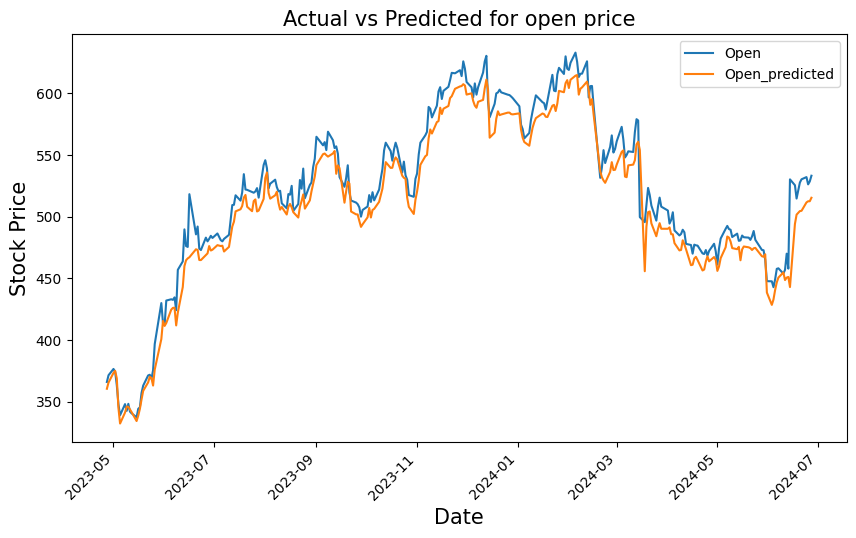

In [ ]:
df_merge[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

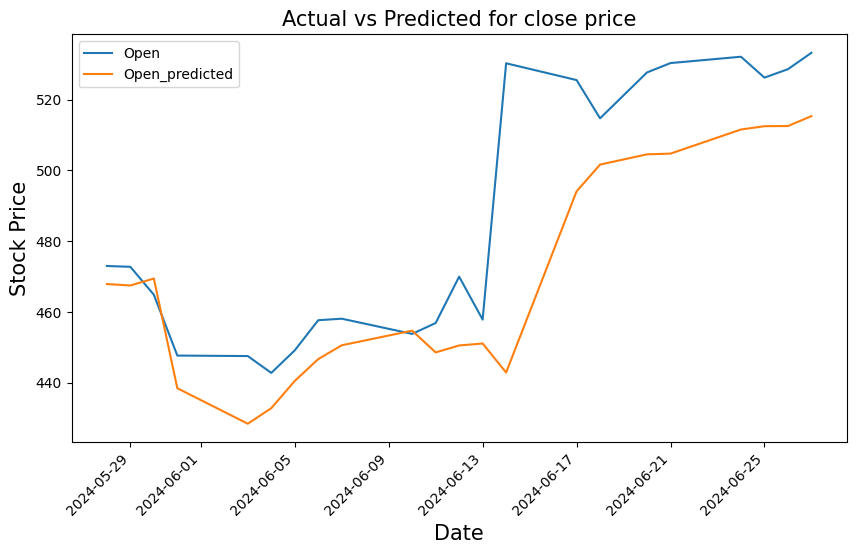

In [ ]:
df_merge[['Open','Open_predicted']][-22:].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [ ]:
df_future = df_merge._append(pd.DataFrame(columns=df_merge.columns,index=pd.date_range(start=df_merge.index[-1], periods=3, freq='D')))
#df_merge[date.today(): date.today()+timedelta(12)]

In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close','Adj Close','Volume'],index=df_future[-3:].index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = x_test[-1:]
x = None
for i in range(-2,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(x_test[-1:].shape)

1/1 [==============================] - 0s 38ms/step


In [ ]:
up_pred

array([[0.5567913 , 0.5659107 , 0.5681413 , 0.5681046 , 0.567503  ,
        0.10265961]], dtype=float32)

In [ ]:
upcoming_prediction.iloc[0] = df.iloc[-1]
upcoming_prediction

,Open,High,Low,Close,Adj Close,Volume
2024-06-27,0.625368,0.653518,0.65357,0.668578,0.668578,0.152027
2024-06-28,0.584296,0.59221,0.596884,0.595632,0.59502,0.092916
2024-06-29,0.556791,0.565911,0.568141,0.568105,0.567503,0.10266


In [ ]:
upcoming_prediction[upcoming_prediction.columns] = MMS.inverse_transform(upcoming_prediction[upcoming_prediction.columns])
upcoming_prediction

,Open,High,Low,Close,Adj Close,Volume
2024-06-27,533.210022,549.159973,532.099976,546.760010,546.760010,4.732100e+06
2024-06-28,515.332453,522.551120,508.077291,515.591644,515.329961,3.121261e+06
2024-06-29,503.360136,511.136544,495.896899,503.829740,503.572667,3.386777e+06


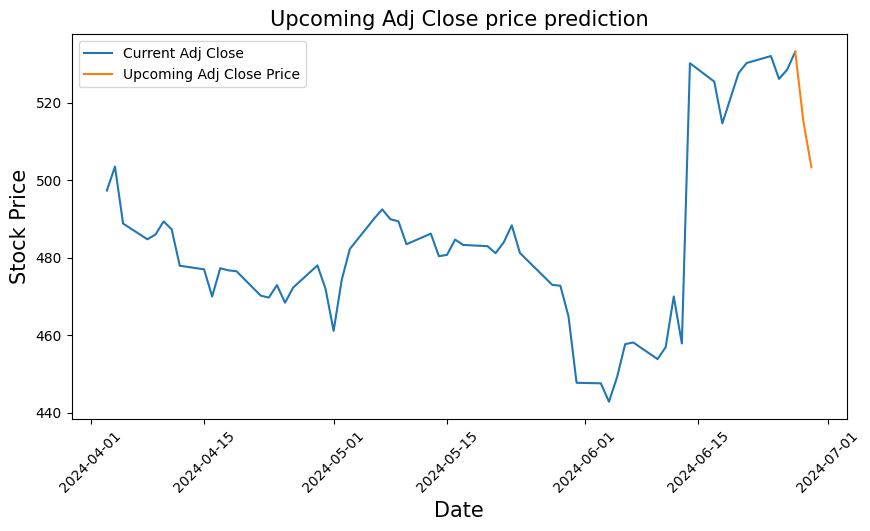

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.iloc[-60:]['Open'],label='Current Adj Close')
ax.plot(upcoming_prediction.iloc[-60:]['Open'],label='Upcoming Adj Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Adj Close price prediction',size=15)
ax.legend()
fig.show()